# Exam 2 (100 pts total)

April 8, 2024

**Files required:** `HPI_PO_monthly_hist.xlsx`, `epa.csv`, and `cb_2022_us_state_5m.zip` which are linked next to the exam on Canvas in the file `exam2_data.zip`. Save these files in the same directory as your exam notebook.

**Instructions:** You have 75 minutes to complete the exam. It is open note and open internet. Remember that Python and many packages have built-in help. You **may not** work with any other person via chat, Slack, etc. or explicitly solicit answers to these questions online via Chegg, ChatGPT, etc. Also, **do not** modify the data files directly. The academic misconduct policy is in effect.

Answer all questions in this notebook. Insert as many cells as you need, but be sure to use markdown and code when we ask for them. When you are finished, upload your completed notebook to Canvas. You **must** submit an .ipynb file that can be run in JupyterLab; we will not accept .pdf/.py/.html/etc.

Try not to get stuck. If you have difficulty answering a question, set it aside and return to it later if possible. **Partial credit will be given throughout.**

## Question 0 (5 pts): Hong, Ruijing
 
Replace 'Last, First' above with your actual name. Enter it as: last name, first name.

## Question 1 (15 pts)

1. The file `HPI_PO_monthly_hist.xlsx` contains monthly data on US housing price indexes from the [Federal Housing Finance Agency](https://www.fhfa.gov/DataTools/Downloads/Pages/House-Price-Index-Datasets.aspx). For each Census region, and for the US overall, the file contains seasonally-adjusted and non-seasonally-adjusted housing price indexes, all of which are normalized relative to the beginning of 1991. Load the file into a DataFrame.
2. Plot the **quarterly** average housing index for the US. Use the column `USA\n\n(NSA)`, which is not seasonally adjusted. 
3. Add a vertical line at Quarter 3 of 2008. Label it "Lehman Brothers Collapse".

Make your figure graphically excellent. 

In [1]:
import pandas as pd 
import numpy as np              
import matplotlib.pyplot as plt  
import seaborn as sns
import datetime as dt            

In [118]:
df =pd.read_excel('HPI_PO_monthly_hist.xlsx', header=3, parse_dates=['Month'], index_col='Month')
df.head()

,East North Central\n(NSA),East North Central\n(SA),East South Central\n(NSA),East South Central\n(SA),Middle Atlantic\n(NSA),Middle Atlantic\n(SA),Mountain\n\n(NSA),Mountain\n\n(SA),New England\n\n(NSA),New England\n\n(SA),Pacific\n\n(NSA),Pacific\n\n(SA),South Atlantic\n(NSA),South Atlantic\n(SA),West North Central\n(NSA),West North Central\n(SA),West South Central\n(NSA),West South Central\n(SA),USA\n\n(NSA),USA\n\n(SA)
Month,,,,,,,,,,,,,,,,,,,,
1991-01-01,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
1991-02-01,100.89,100.95,101.02,100.63,100.14,100.36,98.38,98.75,101.72,102.23,100.12,100.57,100.57,100.46,100.51,100.47,99.83,99.59,100.38,100.45
1991-03-01,101.30,100.91,100.84,100.42,100.10,99.83,100.21,100.63,101.49,101.17,99.96,100.14,101.00,100.60,100.46,100.16,100.62,100.49,100.68,100.47
1991-04-01,101.69,100.98,100.81,100.45,99.59,99.29,100.29,100.37,101.02,100.88,100.15,100.13,100.89,100.41,100.85,100.39,100.36,100.07,100.68,100.33
1991-05-01,102.31,101.35,101.13,100.73,99.72,99.26,100.68,100.46,99.79,99.55,100.33,100.10,100.76,100.47,100.82,100.34,100.77,100.25,100.84,100.37


In [125]:
#2
df2 = df.resample('q').mean()
df1 = df2.groupby('Month')["USA\n\n(NSA)"].mean()
df1

Month
1991-03-31    100.353333
1991-06-30    100.956667
1991-09-30    101.316667
1991-12-31    101.926667
1992-03-31    102.706667
                 ...    
2023-03-31    394.416667
2023-06-30    410.903333
2023-09-30    417.736667
2023-12-31    416.676667
2024-03-31    413.450000
Freq: Q-DEC, Name: USA\n\n(NSA), Length: 133, dtype: float64

Text(2008-07-01 00:00:00, 250, 'Lehman Brothers Collapse')

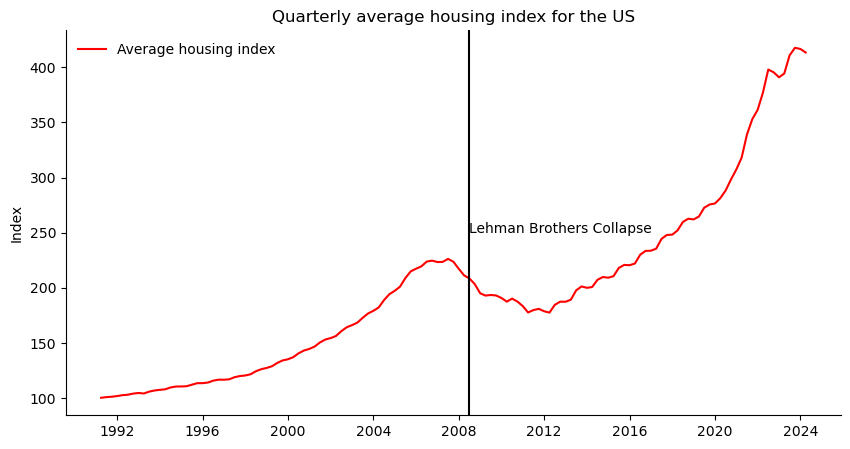

In [131]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(df1.index, df1, color = 'red', label = 'Average housing index', alpha = 1)

ax.set_title('Quarterly average housing index for the US')
ax.set_ylabel("Index")
sns.despine(ax=ax)
ax.legend(frameon=False)

ax.axvline(dt.datetime(2008,7,1), color='black')
ax.annotate('Lehman Brothers Collapse', 
            xy=(dt.datetime(2008,7,1), 250))




## Question 2 (15 pts)

1. Use `.map()` or `applymap()` or `.apply()` to create a new DataFrame that categorizes each value in the housing price indexes in the monthly DataFrame from Question 1. If a value is greater than 200, the category should be "doubled"; if a value is greater than 300, the category should be "tripled"; if a value is greater than 400, the category should be "quadrupled." Otherwise, the category should be empty "". Show the `.value_counts()` for the 'New England\n\n(NSA)' column in the new DataFrame.
2. Stack the DataFrame so that each row is a month-region-variable combination. The first row should have the date `1/1/91` and the region-variable 'East North Central\n\n(NSA)'; the last row should have the date `1/1/24` and the region-variable 'USA\n\n(SA)'.' Print the top 5 and bottom 5 rows.

## Question 3 (25 pts)

The file `epa.csv` contains data on recorded pollution during a calendar year by US state. The data are from the US [Environmental Protection Agency](https://echo.epa.gov/trends/loading-tool/get-data/state-statistics).

1. Load in the data. Add together the variables `Total Toxic-Weighted Pounds (lb-eq/yr) for Majors` and `Total Toxic-Weighted Pounds (lb-eq/yr) for Non-Majors`. This will be the total pollution variable we'll work with.
2. Drop the geographies that aren't part of the contiguous US: `['AMERICAN SAMOA', 'GUAM', 'GULF OF MEXICO', 'GULF OF MEXICO EAST', 'MARIANA ISLANDS', 'VIRGIN ISLANDS', 'HAWAII', 'PUERTO RICO', 'ALASKA']`.
3. Compute, for each EPA region, the mean and standard deviation of the total pollution variable. Print out a single DataFrame that holds the mean and standard deviation by EPA region.
4. Use code to select the data for the states that are the five with the highest pollution.
5. Plot the pollution levels for those five states in a bar chart. Make the figure 8 inches wide and 5 inches high. The message of the figure should be "these are top-polluting US states."

Make your figure graphically excellent.

In [144]:
epa = pd.read_csv('epa.csv',header = 3)
epa.head(2)
epa['total_pop'] = epa["Total Toxic-Weighted Pounds (lb-eq/yr) for Majors"] + epa["Total Toxic-Weighted Pounds (lb-eq/yr) for Non-Majors"]
epa
#drop_list = ['AMERICAN SAMOA', 'GUAM', 'GULF OF MEXICO', 'GULF OF MEXICO EAST', 'MARIANA ISLANDS', 'VIRGIN ISLANDS', 'HAWAII', 'PUERTO RICO', 'ALASKA']
#epa_drop = epa.drop('State' == drop_list, axis= 1)
print(epa["Total Pollutant Pounds (lb/yr) for Majors"].std())

print(epa["Total Pollutant Pounds (lb/yr) for Majors"].mean())
epa

level = epa[["Total Pollutant Pounds (lb/yr) for Majors","State"]].groupby("State").agg(['std','mean'])
level

2199045719.0256214
1053806898.5178572


,Total Pollutant Pounds (lb/yr) for Majors
,mean
State,
ALABAMA,1.562347e+09
ALASKA,1.183061e+08
AMERICAN SAMOA,3.965400e+06
ARIZONA,1.183145e+09
ARKANSAS,4.808170e+08
CALIFORNIA,3.608784e+09
COLORADO,8.396064e+08
CONNECTICUT,4.022754e+07


In [ ]:
fig, ax = plt.subplots( figsize=(15,15))

ax.bar(level.index, level["Total Pollutant Pounds (lb/yr) for Majors
"], color='silver')

ax.set_title('Totoal pollutant pounds for all states')


## Question 4 (30 pts)

The file `epa.csv` contains data on recorded pollution during 2023 by US state. The data are from the US [Environmental Protection Agency](https://echo.epa.gov/trends/loading-tool/get-data/state-statistics).

The file `cb_2022_us_state_5m.zip` contains the shapefile for the US states. The shapefiles are from the US Census Bureau.

1. Do whatever is necessary to clean up your EPA DataFrame from above to make it possible to merge with the state shapefile.
2. Merge the EPA data with the state shapefile.
4. Create a choropleth of the contiguous US that shows the variation in pollution in 2023. 
5. The default looks pretty bad because there's such wide variation in pollution levels across states. Change the scale to be in log points using `np.log10()` (which requires importing numpy as np).
6. Make the choropleth again. What is the message of your choropleth?

Make your figure graphically excellent.

In [99]:
import geopandas             
cleaned_epa = pd.read_csv('epa.csv',header = 3)
state = geopandas.read_file('cb_2022_us_state_5m.zip')
#state.head()
state.NAME = [x.upper() for x in state.NAME]
state.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,35,00897535,0400000US35,35,NM,NEW MEXICO,00,314198573403,726463825,"POLYGON ((-109.05017 31.48000, -109.04984 31.4..."
1,72,01779808,0400000US72,72,PR,PUERTO RICO,00,8869029522,4922249087,"MULTIPOLYGON (((-65.33570 18.34953, -65.32933 ..."
2,48,01779801,0400000US48,48,TX,TEXAS,00,676685555821,18974391187,"POLYGON ((-106.64548 31.89867, -106.64084 31.9..."
3,21,01779786,0400000US21,21,KY,KENTUCKY,00,102266581101,2384240769,"MULTIPOLYGON (((-89.40565 36.52817, -89.39869 ..."
4,39,01085497,0400000US39,39,OH,OHIO,00,105823621267,10274734976,"MULTIPOLYGON (((-82.73571 41.60336, -82.72309 ..."


In [93]:
cleaned_epa.head()

,EPA Region,State,# of Majors in ICIS-NPDES,# of Non-Majors in ICIS-NPDES,# of Majors w/ Pollutant Loadings,# of Non-Majors w/ Pollutant Loadings,% of Majors w/ Pollutant Loadings,% of Non-Majors w/ Pollutant Loadings,Total Pollutant Pounds (lb/yr) for Majors,Total Pollutant Pounds (lb/yr) for Non-Majors,Total Toxic-Weighted Pounds (lb-eq/yr) for Majors,Total Toxic-Weighted Pounds (lb-eq/yr) for Non-Majors
0,4,ALABAMA,175.0,1149,174.0,995,99.0,87,1.562347e+09,2.613256e+10,466652.0,751374.0
1,10,ALASKA,40.0,51,38.0,39,95.0,76,1.183061e+08,3.058088e+06,45937.0,208.0
2,9,AMERICAN SAMOA,4.0,1,3.0,1,75.0,100,3.965400e+06,3.043300e+04,88064.0,313.0
3,9,ARIZONA,76.0,91,68.0,89,89.0,98,1.183145e+09,2.520436e+07,204597.0,1090.0
4,6,ARKANSAS,117.0,682,117.0,679,100.0,100,4.808170e+08,3.528519e+07,158305.0,29553.0


In [105]:
merge_inner= pd.merge(left = state, right = cleaned_epa, left_on = ['NAME'], right_on = ['State'], how='inner', indicator = True)
merge_inner.head(2)


,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,...,# of Non-Majors in ICIS-NPDES,# of Majors w/ Pollutant Loadings,# of Non-Majors w/ Pollutant Loadings,% of Majors w/ Pollutant Loadings,% of Non-Majors w/ Pollutant Loadings,Total Pollutant Pounds (lb/yr) for Majors,Total Pollutant Pounds (lb/yr) for Non-Majors,Total Toxic-Weighted Pounds (lb-eq/yr) for Majors,Total Toxic-Weighted Pounds (lb-eq/yr) for Non-Majors,_merge
0,35,00897535,0400000US35,35,NM,NEW MEXICO,00,314198573403,726463825,"POLYGON ((-109.05017 31.48000, -109.04984 31.4...",...,77,31.0,75,100.0,97,1.516858e+08,11935560.0,55936980.0,17307.0,both
1,72,01779808,0400000US72,72,PR,PUERTO RICO,00,8869029522,4922249087,"MULTIPOLYGON (((-65.33570 18.34953, -65.32933 ...",...,136,63.0,134,100.0,99,2.619977e+09,14562971.0,125166.0,2723.0,both


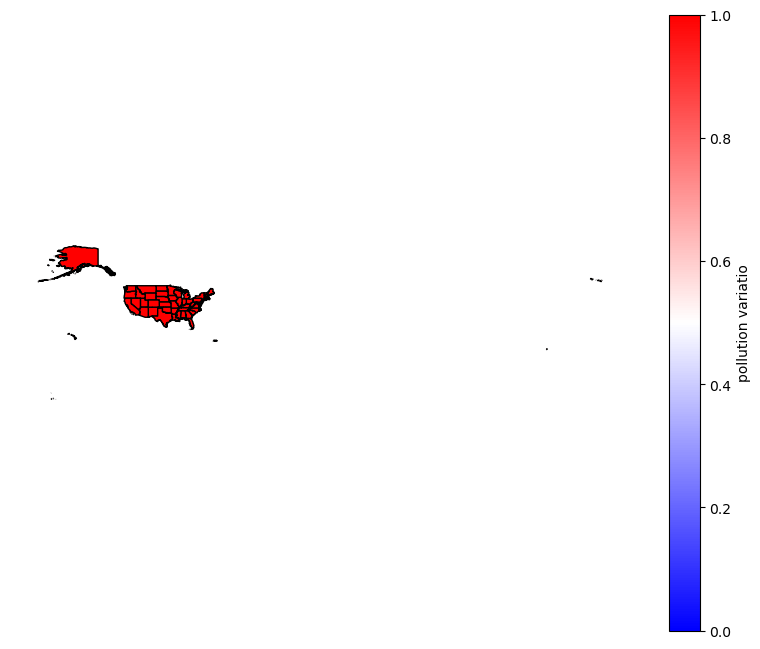

In [117]:
#Create a choropleth of the contiguous US that shows the variation in pollution in 2023.
fig, gax = plt.subplots(figsize = (10,8))

# Plot the counties and pass 'trump_share' as the data to color
merge_inner.plot(ax=gax, edgecolor='black', column= "% of Majors w/ Pollutant Loadings",  legend=True, cmap='bwr', legend_kwds={'label':'pollution variatio'}, vmin=0, vmax=1)
          
#scale =np.log10()
plt.axis('off')
plt.show()


## Question 5 (10 pts)

1. What did we learn from the choropleth created above, that we didn't learn from the bar chart?
2. Explain **step by step** how you would create a visualization that conveys how pollution has changed within each state over time. What data would you need, how would you assemble your DataFrame, and what visualization would you use?
3. It was a bit of a fudge to change our above choropleth to be in log scale. One issue is that pollution is generated by economic activity, and economic activity is lower in states with lower populations. How would you adjust the above choropleth to account for differences in population?

1. I only used one variable to show the variation in pollution, which doesn't give much helpful information about the level of pollution in each state. A bar chart won't be able to tell how pollution level is related across states and regions
2. use more variables to draw comparisons between different pollution categories. Choropleth is a good viusalization for understanding pollution density level, otherwise a bar graph can be used to visualize which state has the highest/lowest level of pollution
3. To account for differene in population, I would rescale population size of each state by dividing population in each state by the total population in the US. 